In [99]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import time
%matplotlib inline
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

In [100]:
x_train=np.loadtxt('X_train.csv',delimiter=',')
y_train=np.loadtxt('Y_train.csv',delimiter=',')
x_test=np.loadtxt('X_test.csv',delimiter=',')
y_test=np.loadtxt('Y_test.csv',delimiter=',')

x_train=x_train/np.max(np.abs(x_train),axis=0)
y_train=y_train/np.max(np.abs(y_train),axis=0)
x_test=x_test/np.max(np.abs(x_test),axis=0)
y_test=y_test/np.max(np.abs(y_test),axis=0)

print(np.shape(x_train),np.shape(y_train),np.shape(x_test),np.shape(y_test))

(100, 128) (100, 3) (20, 128) (20, 3)


In [115]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape = (128,)))
model.add(BatchNormalization())

model.add(Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(3, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer = Adam(lr=1e-4), metrics=["accuracy"]) #binary_crossentropy

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_test, y_test), #For speed
                           callbacks=[annealer])

Train on 100 samples, validate on 20 samples
Epoch 1/20
 - 4s - loss: 0.1704 - acc: 0.3900 - val_loss: 0.1170 - val_acc: 0.7500
Epoch 2/20
 - 0s - loss: 0.0635 - acc: 0.8000 - val_loss: 0.0600 - val_acc: 0.7500
Epoch 3/20
 - 0s - loss: 0.0667 - acc: 0.7900 - val_loss: 0.0839 - val_acc: 0.9000
Epoch 4/20
 - 0s - loss: 0.0583 - acc: 0.7200 - val_loss: 0.1093 - val_acc: 0.8500
Epoch 5/20
 - 0s - loss: 0.0546 - acc: 0.8400 - val_loss: 0.1146 - val_acc: 0.7000
Epoch 6/20
 - 0s - loss: 0.0554 - acc: 0.7300 - val_loss: 0.1140 - val_acc: 0.6500
Epoch 7/20
 - 0s - loss: 0.0441 - acc: 0.7800 - val_loss: 0.1102 - val_acc: 0.7500
Epoch 8/20
 - 0s - loss: 0.0500 - acc: 0.8000 - val_loss: 0.1168 - val_acc: 0.7500
Epoch 9/20
 - 0s - loss: 0.0514 - acc: 0.7400 - val_loss: 0.1128 - val_acc: 0.9000
Epoch 10/20
 - 0s - loss: 0.0487 - acc: 0.7400 - val_loss: 0.1055 - val_acc: 0.9000
Epoch 11/20
 - 0s - loss: 0.0445 - acc: 0.8300 - val_loss: 0.1045 - val_acc: 0.8000
Epoch 12/20
 - 0s - loss: 0.0426 - acc: 

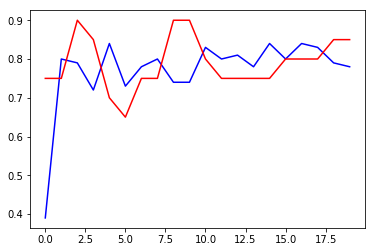

In [116]:
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [117]:
model.evaluate(x_test, y_test)

20/20 [==============================] - 0s 311us/step


[0.06993250548839569, 0.8500000238418579]

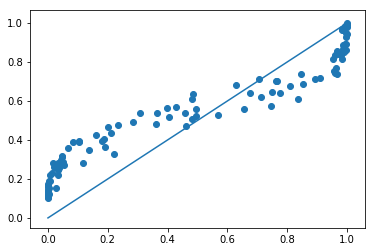

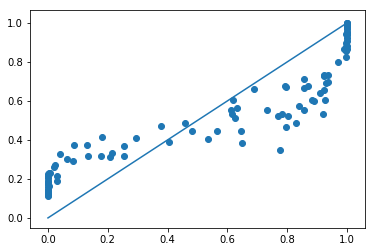

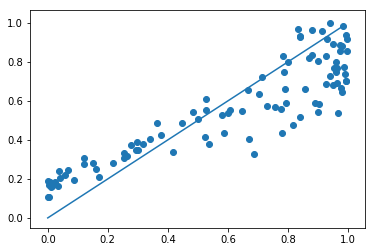

In [118]:
for i in range(3):
    plt.scatter(model.predict(x_train)[:,i],y_train[:,i])
    plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
    plt.show()

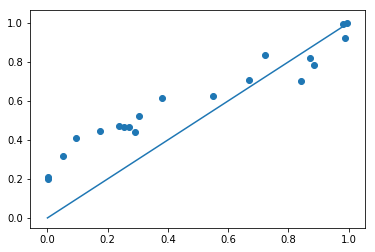

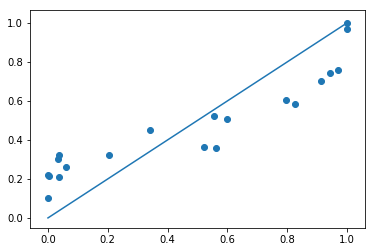

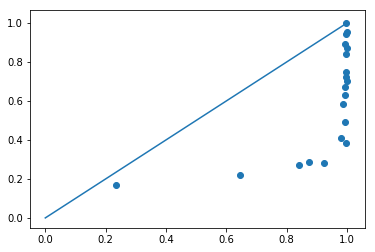

In [120]:
for i in range(3):
    plt.scatter(model.predict(x_test)[:,i],y_test[:,i])
    plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01))
    plt.show()